## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_flat = study_results.merge(mouse_metadata, on="Mouse ID")
df_flat

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [10]:
# Checking the number of mice in the DataFrame.
len(df_flat["Mouse ID"].unique())

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
s1 = df_flat.duplicated(["Mouse ID", "Timepoint"])
df_flat[s1]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
df_flat[df_flat["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
deduped = df_flat.drop_duplicates(["Mouse ID", "Timepoint"])
deduped

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [36]:
# Checking the number of mice in the clean DataFrame.
len(deduped["Mouse ID"].unique())

249

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
gby_regimen = deduped.groupby("Drug Regimen")
gby_regimen["Tumor Volume (mm3)"].mean()
# This method is the most straighforward, creating multiple series and putting them all together at the end.

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.DataFrame({
    "mean":     gby_regimen["Tumor Volume (mm3)"].mean(),
    "median":   gby_regimen["Tumor Volume (mm3)"].median(),
    "variance": gby_regimen["Tumor Volume (mm3)"].var(),
    "stdev":    gby_regimen["Tumor Volume (mm3)"].std(),
    "SEM":      gby_regimen["Tumor Volume (mm3)"].sem()
})
summary

,mean,median,variance,stdev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

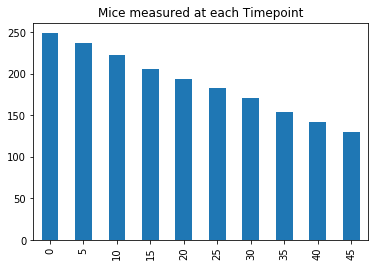

In [52]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
deduped["Timepoint"].value_counts().plot(kind="bar", title="Mice measured at each Timepoint")

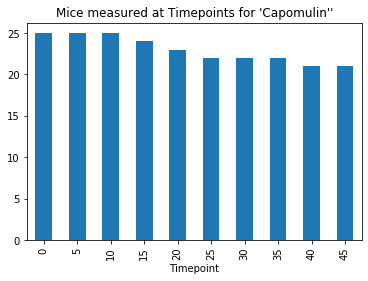

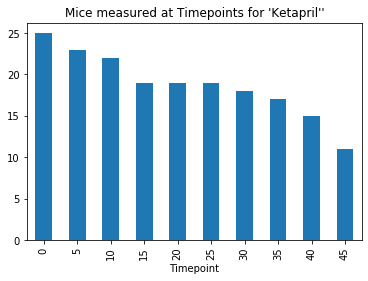

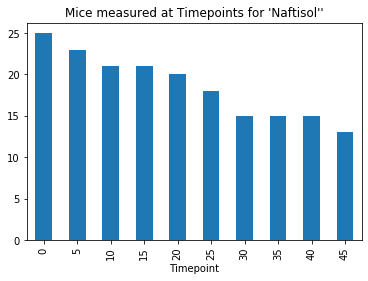

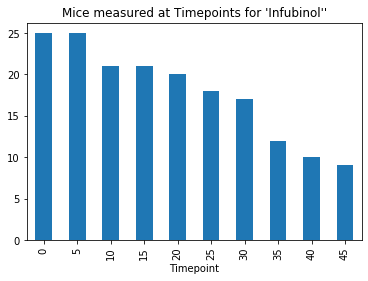

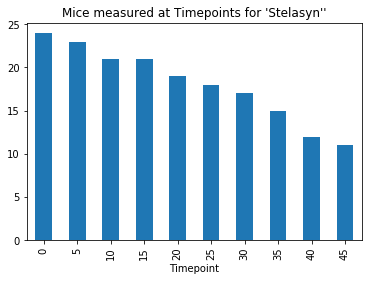

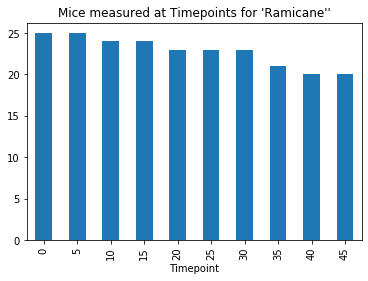

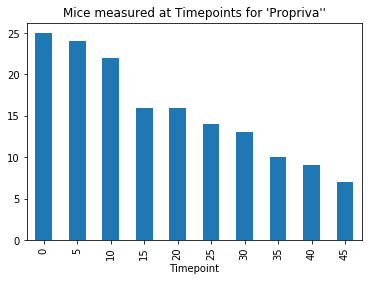

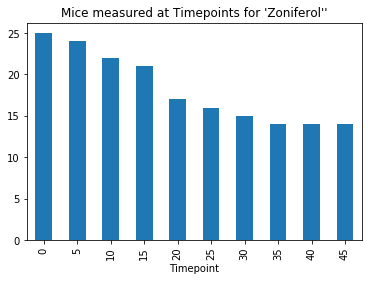

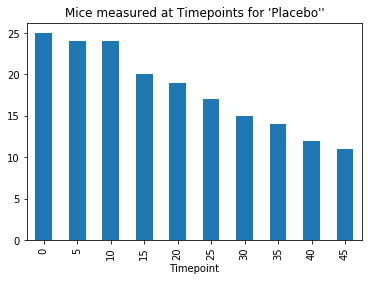

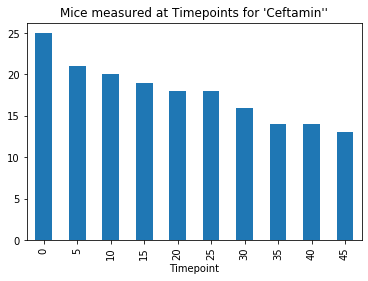

In [71]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#df = pd.DataFrame()
for drug in deduped["Drug Regimen"].unique():
    plt.figure()
    df = gby_regimen["Timepoint"].value_counts()[drug]
    df.plot(kind="bar", title=f"Mice measured at Timepoints for '{drug}''")

## Pie Plots

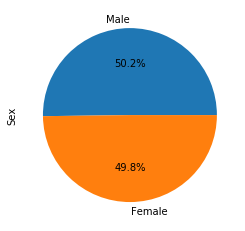

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
_ = deduped.drop_duplicates(["Mouse ID"])["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%")

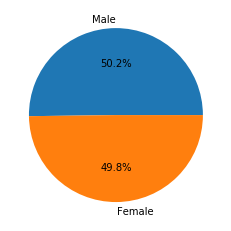

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
s1 = deduped.drop_duplicates(["Mouse ID"])["Sex"].value_counts()

_ = plt.pie(
    s1,
    labels = s1.index,
    autopct = "%1.1f%%")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
